In [15]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
#from pandas_datareader import data as wb
from datetime import datetime, timedelta
import json
import requests
import random
import os

In [16]:
csv_path = Path('monthly_data.csv')
monthly_df = pd.read_csv(csv_path, index_col = "Date")
monthly_df.head()

,DXC,BBY,AMG,CNP,WMT,MRK,NEM,VFC,MDT,HST,...,UNH,HSY,FB,EIX,SBUX,MCO,HII,RL,LNT,AXP
Date,,,,,,,,,,,,,,,,,,,,,
3/31/15,22.128880,33.179913,209.090057,16.580273,73.015411,49.780846,20.141970,62.421577,70.460373,16.215014,...,109.714111,89.785667,82.220001,53.208439,43.336098,97.564026,131.290314,118.733910,26.846176,72.461044
4/30/15,21.847523,30.422970,220.139389,17.035191,69.286972,51.582237,24.576731,60.034454,67.262138,16.182875,...,103.323639,81.786682,78.769997,51.905262,45.377064,101.060547,123.271454,120.458458,25.997549,71.839569
5/31/15,21.847523,30.422970,220.139389,17.035191,69.286972,51.582237,24.576731,60.034454,67.262138,16.182875,...,103.323639,81.786682,78.769997,51.905262,45.377064,101.060547,123.271454,120.458458,25.997549,71.839569
6/30/15,22.407070,28.825178,212.808884,15.652534,63.363731,49.679543,21.693781,58.084694,67.285637,16.092331,...,113.634422,79.484596,85.769997,47.695503,49.230713,101.788795,105.818543,119.940102,24.815250,72.359734
7/31/15,22.335381,28.542316,202.392349,15.907512,64.301750,51.451008,15.945307,64.206329,71.181107,15.727145,...,113.075554,83.117447,94.010002,51.497070,53.187904,104.117599,110.348679,114.077202,26.687109,70.814239


In [17]:
monthly_returns = monthly_df.pct_change()

In [18]:
sharpe_ratio = (monthly_df.mean()) / (monthly_df.std() * np.sqrt(12))
sharpe_ratio

DXC    0.675362
BBY    0.828584
AMG    1.104839
CNP    1.375772
WMT    1.262941
         ...   
MCO    0.934332
HII    1.162941
RL     1.688381
LNT    1.381842
AXP    1.209096
Length: 100, dtype: float64

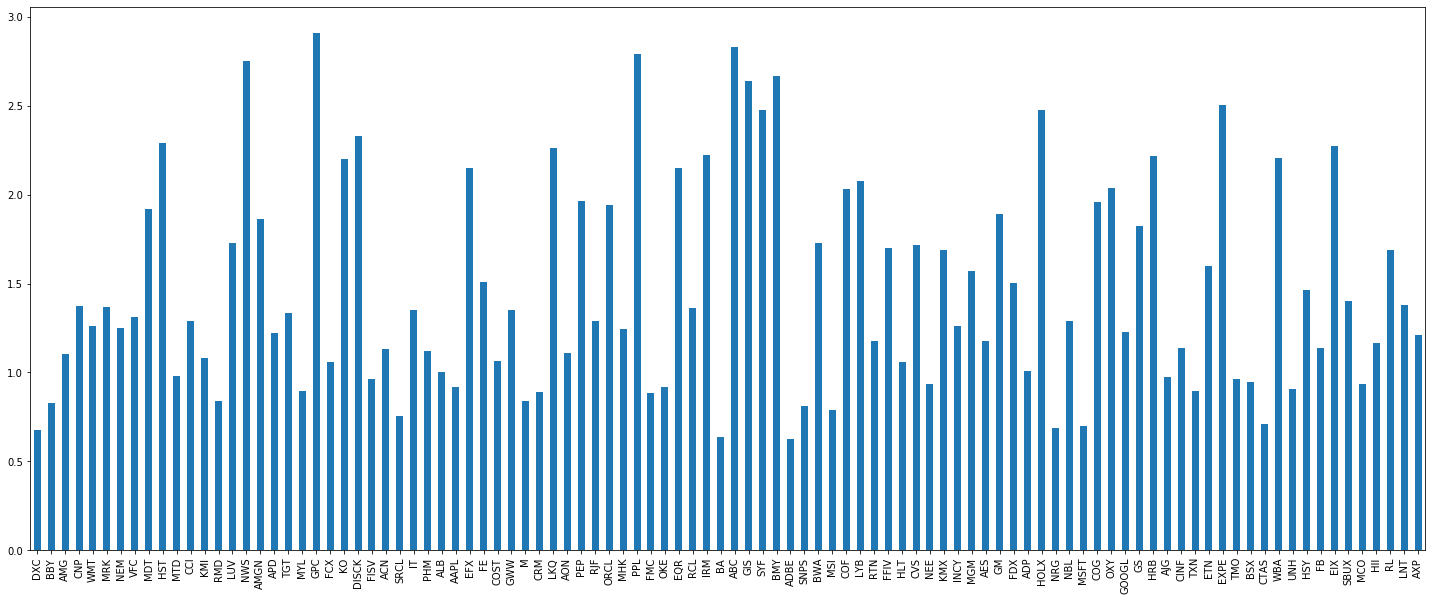

In [19]:
sharpe_ratio.plot(kind='bar', figsize=(25,10))